In [1]:
%pylab inline
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
from tardis import *
from scipy import sparse,ndimage
from scipy.stats import gaussian_kde
import corner
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib
Tensorflow Version:  1.15.0


Using TensorFlow backend.


Running TARDIS 2.1...


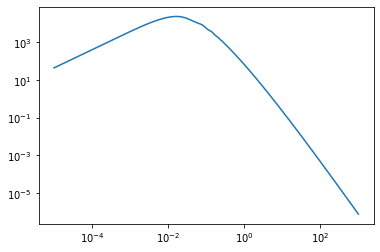

In [2]:
klin = np.loadtxt('Planck15_a1p00.txt').T[0]
plin = np.loadtxt('Planck15_a1p00.txt').T[1]
plt.loglog(klin,plin)
ipklin = iuspline(klin, plin)

In [4]:
n=64
uni1 = universe(bs=n, nc=n,z_f=1,ipklin = ipklin )
uni1.evolv()
flux_true1 = exp(-uni1.final_tau_RSD)[0]

(64, 64, 64)
262144 65 262144
Total run time 3.110926389694214


In [5]:
n_los = 1200
mock_lya1 = lya_survey(uni1,2,10,sm=0.5,n_skewers=n_los)
mock_lya1.select_skewers()
# imshow(np.exp(-1*uni1.final_tau_RSD[0,:,:,0]),cmap="Blues")
# colorbar()
# plt.scatter(mock_lya1.skewers_fin[::n][:,0],mock_lya1.skewers_fin[::n][:,1],color='k',marker='.',label='skewers')
# legend(loc=1)

In [6]:
skewers_fin1 = mock_lya1.skewers_fin
flux_obs1 = mock_lya1.vals_observed
inverse_covar1 = mock_lya1.inverse_covar
uni_final_true1 = uni1.final_true
uni_final_tau_RSD1 = uni1.final_tau_RSD
flux_true1 = exp(-uni_final_tau_RSD1[0])
flux_contrast1 = flux_obs1/flux_obs1.mean()-1

$k_1=6,k_2=6,k_3=0.7,k_3=0.7$

In [8]:
opt_recon1 = reconstruct_opt(uni1,mock_lya1,anneal_steps=[2.5,1.5,1,0.7],k=[6,6,0.7,0.7],bound=False)
opt_recon1.initmodel()
tau_opt_recon1,flux_los_opt_recon1 = opt_recon1.run_model()
flux_opt_recon1 = exp(-tau_opt_recon1[0])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2073274.500000
  Number of iterations: 17
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 2061855.375000
  Number of iterations: 50
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 2043763.875000
  Number of iterations: 60
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 2015792.625000
  Number of iterations: 30
  Number of functions evaluations: 31
Total run time 12.270449


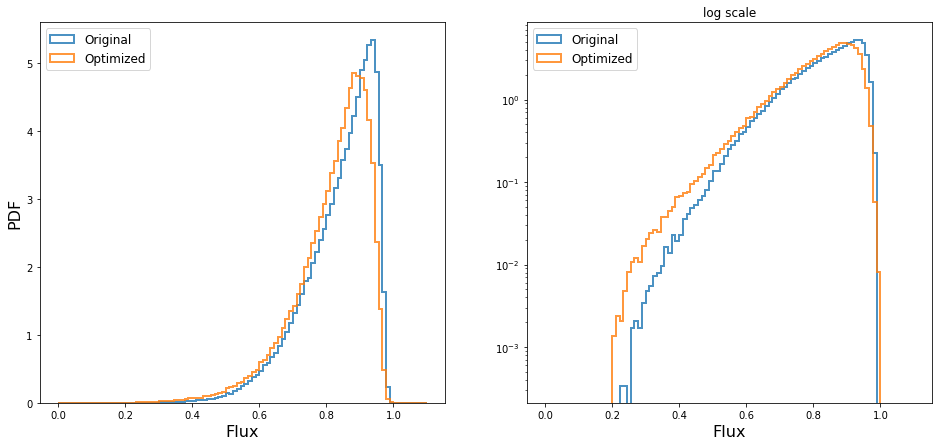

In [9]:
# sigma = 1.4*d_los
sigma = 2
fig = figure(figsize=(16,7))

bins=linspace(0.0,1.1,100)
ax1 = fig.add_subplot(121)
h_list = {'histtype':'step','linewidth':2,'bins':bins,'alpha':0.8,'density':True}
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list)
ax1.hist(ndimage.gaussian_filter(flux_opt_recon1,sigma).flatten(),label='Optimized',**h_list)

legend(loc=2,fontsize=12)
ax1.set_ylabel('PDF',fontsize=16)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)

ax1 = fig.add_subplot(122)
h_list = {'histtype':'step','linewidth':2,'bins':bins,'alpha':0.8,'density':True}
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list)
ax1.hist(ndimage.gaussian_filter(flux_opt_recon1,sigma).flatten(),label='Optimized',**h_list)

legend(loc=2,fontsize=12)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)
ax1.set_title('log scale')
yscale('log')
show()

In [11]:
n_los = [300,600,900,1200,1500,1800,2100,2400,2700,3000]
flux_recon = []
for i in n_los:
    
    mock_lya1 = lya_survey(uni1,2,10,sm=0.5,n_skewers=i)
    mock_lya1.select_skewers()
    opt_recon1 = reconstruct_opt(uni1,mock_lya1,anneal_steps=[2.5,1.5,1,0.7],k=[6,6,0.7,0.7],bound=False)
    opt_recon1.initmodel()
    tau_opt_recon1,flux_los_opt_recon1 = opt_recon1.run_model()
    flux_opt_recon1 = exp(-tau_opt_recon1[0])
    flux_recon.append(flux_opt_recon1)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1674386.250000
  Number of iterations: 26
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1671621.750000
  Number of iterations: 50
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1666680.250000
  Number of iterations: 60
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1658194.500000
  Number of iterations: 30
  Number of functions evaluations: 31
Total run time 12.828207
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective fun

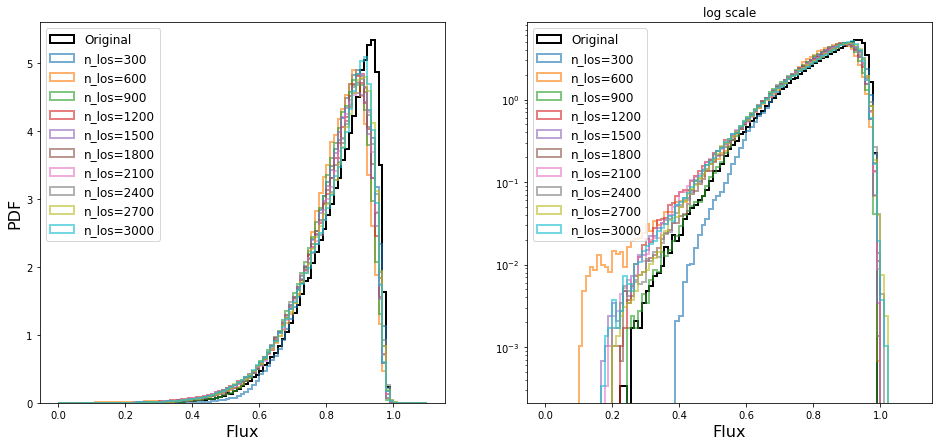

In [16]:
# sigma = 1.4*d_los
sigma = 2
fig = figure(figsize=(16,7))

bins=linspace(0.0,1.1,100)
ax1 = fig.add_subplot(121)
h_list = {'histtype':'step','linewidth':2,'bins':bins,'density':True}
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list,color='k')
for i,flux in enumerate(flux_recon):
    ax1.hist(ndimage.gaussian_filter(flux,sigma).flatten(),label='n_los=%d'%n_los[i],alpha=0.6,**h_list)

legend(loc=2,fontsize=12)
ax1.set_ylabel('PDF',fontsize=16)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)

ax1 = fig.add_subplot(122)
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list,color='k')
for i,flux in enumerate(flux_recon):
    ax1.hist(ndimage.gaussian_filter(flux,sigma).flatten(),label='n_los=%d'%n_los[i],alpha=0.6,**h_list)
legend(loc=2,fontsize=12)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)
ax1.set_title('log scale')
yscale('log')
show()

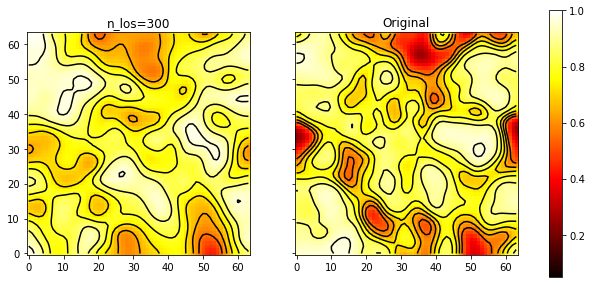

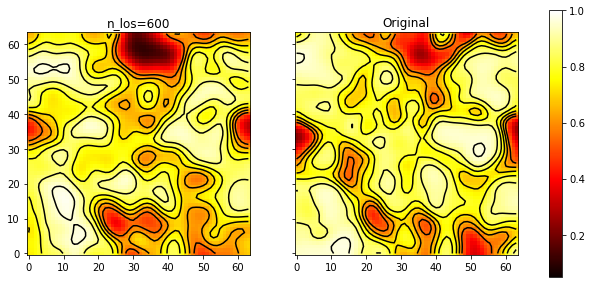

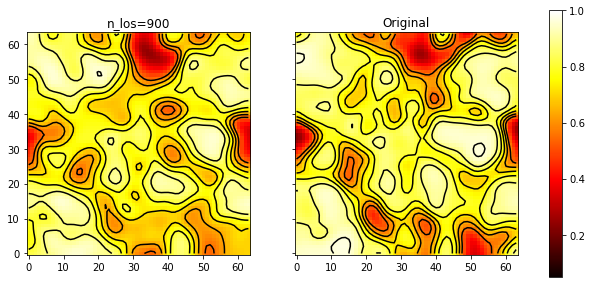

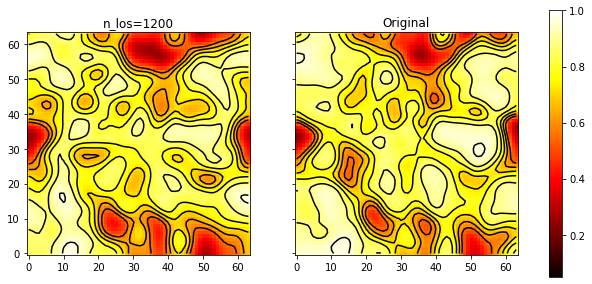

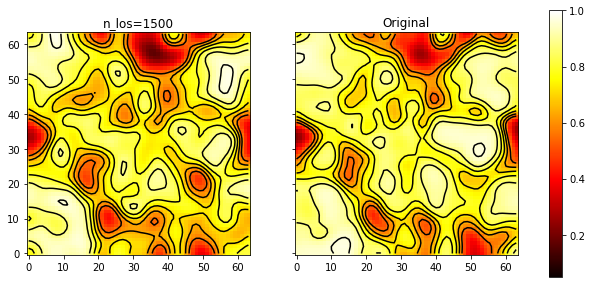

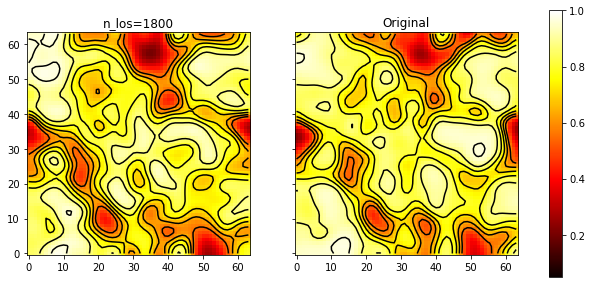

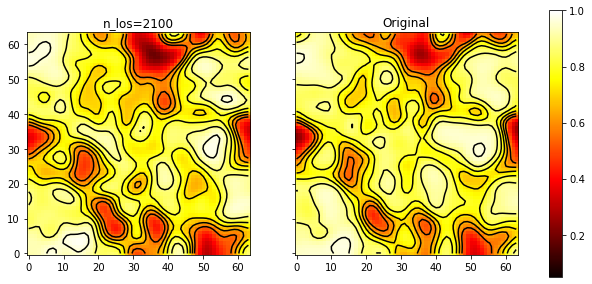

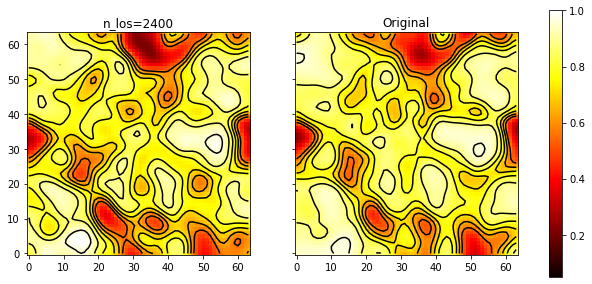

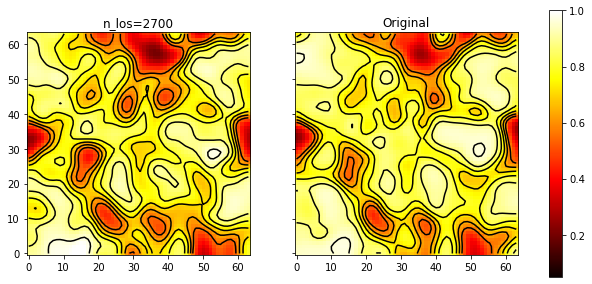

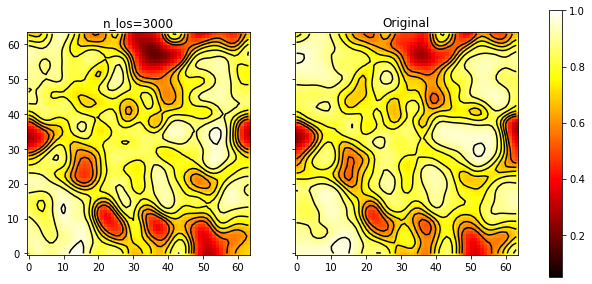

In [26]:
plot_list = {'vmin':0.05,'vmax':1,'cmap':"hot",'origin':'lower'}
con_list = {'levels':array([0.56, 0.64, 0.72, 0.8 , 0.88, 0.96]),'colors':'black'}
true_sm1 = ndimage.gaussian_filter(flux_true1,2)
for i,flux in enumerate(flux_recon):
    for j in range(1):
        opt_sm1 =  ndimage.gaussian_filter(flux,2)
        fig, ax = plt.subplots(1, 2, sharey='row',figsize=(11,5))

        im1 = ax[0].imshow(opt_sm1[:,:,j],**plot_list)
        ax[0].contour(opt_sm1[:,:,j],**con_list)
        ax[0].set_title('n_los=%d'%n_los[i])


        im3 = ax[1].imshow(true_sm1[:,:,j],**plot_list)
        ax[1].contour(true_sm1[:,:,j],**con_list)
        ax[1].set_title('Original')
        colorbar(im3,ax=ax,shrink=0.98)
#         suptitle(i,x=0.45)
    

$k_1=6,k_2=6,k_3=0.7,k_3=0.5$

In [27]:
n_los = [300,600,900,1200,1500,1800,2100,2400,2700,3000]
flux_recon2 = []
for i in n_los:
    
    mock_lya1 = lya_survey(uni1,2,10,sm=0.5,n_skewers=i)
    mock_lya1.select_skewers()
    opt_recon1 = reconstruct_opt(uni1,mock_lya1,anneal_steps=[2.5,1.5,1,0.7],k=[6,6,0.7,0.5],bound=False)
    opt_recon1.initmodel()
    tau_opt_recon1,flux_los_opt_recon1 = opt_recon1.run_model()
    flux_opt_recon1 = exp(-tau_opt_recon1[0])
    flux_recon2.append(flux_opt_recon1)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1549860.500000
  Number of iterations: 24
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1546872.000000
  Number of iterations: 50
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1541599.250000
  Number of iterations: 60
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1532833.125000
  Number of iterations: 30
  Number of functions evaluations: 31
Total run time 13.003755
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective fun

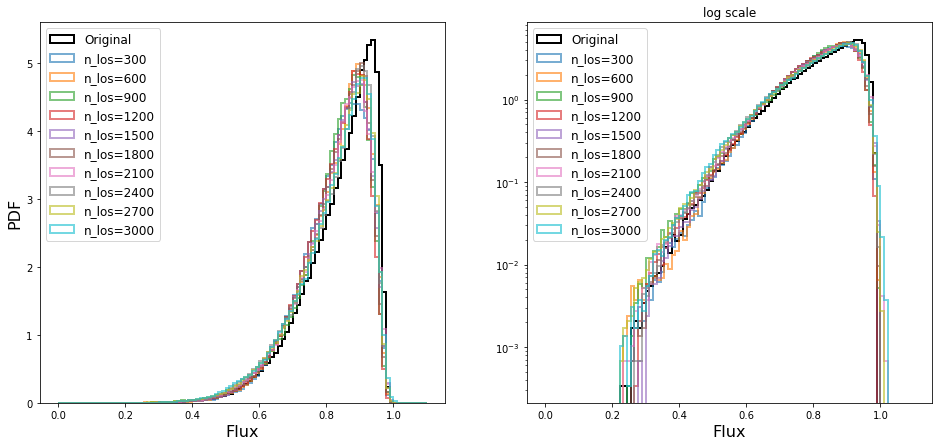

In [28]:
# sigma = 1.4*d_los
sigma = 2
fig = figure(figsize=(16,7))

bins=linspace(0.0,1.1,100)
ax1 = fig.add_subplot(121)
h_list = {'histtype':'step','linewidth':2,'bins':bins,'density':True}
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list,color='k')
for i,flux in enumerate(flux_recon2):
    ax1.hist(ndimage.gaussian_filter(flux,sigma).flatten(),label='n_los=%d'%n_los[i],alpha=0.6,**h_list)

legend(loc=2,fontsize=12)
ax1.set_ylabel('PDF',fontsize=16)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)

ax1 = fig.add_subplot(122)
ax1.hist(ndimage.gaussian_filter(flux_true1,sigma).flatten(),label='Original',**h_list,color='k')
for i,flux in enumerate(flux_recon2):
    ax1.hist(ndimage.gaussian_filter(flux,sigma).flatten(),label='n_los=%d'%n_los[i],alpha=0.6,**h_list)
legend(loc=2,fontsize=12)
ax1.set_xlabel('Flux',fontsize=16)
# ax1.set_title('Smoothed with gaussian kernel %.2f (1.4<d_los>)'%sigma)
ax1.set_title('log scale')
yscale('log')
show()

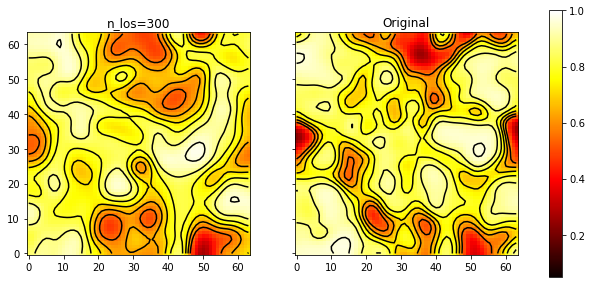

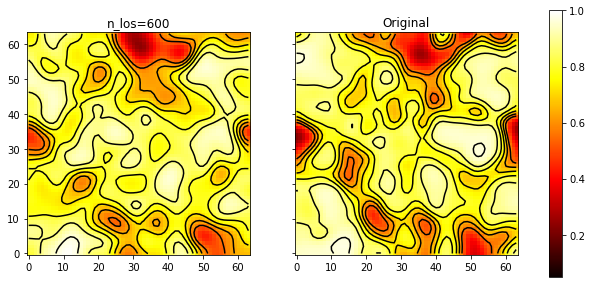

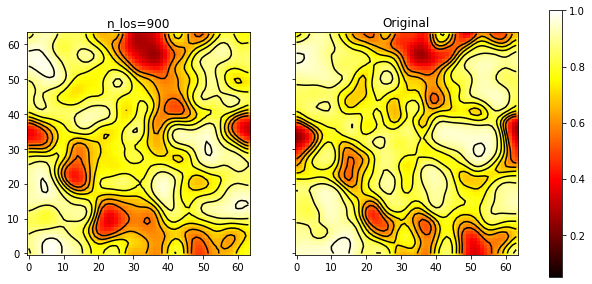

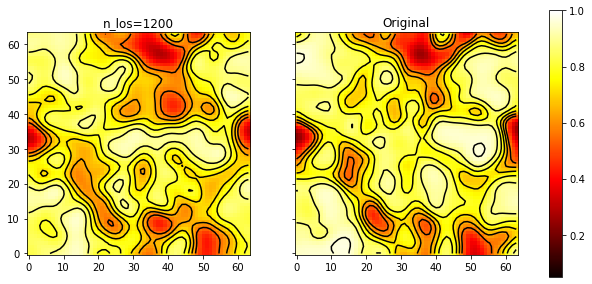

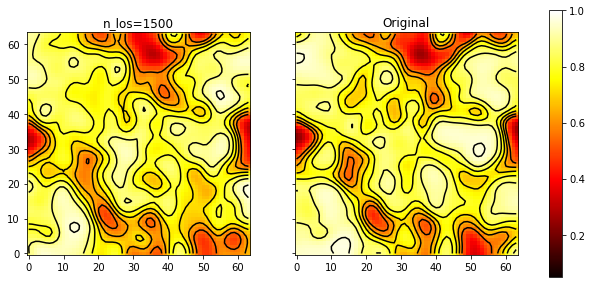

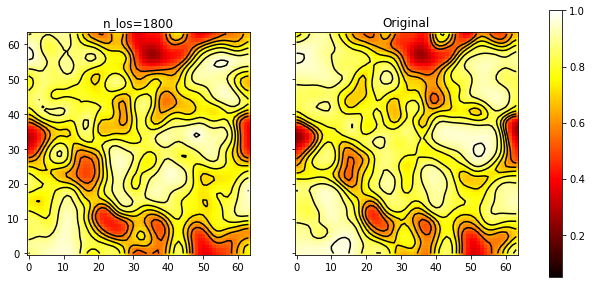

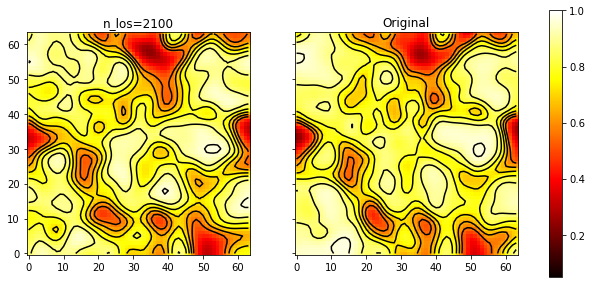

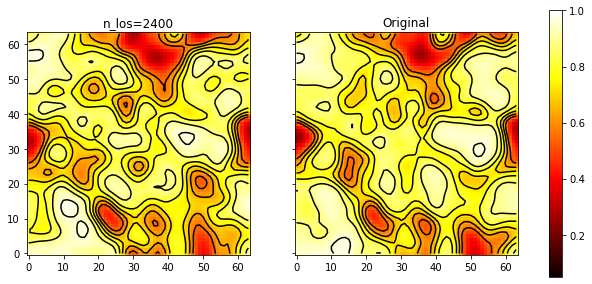

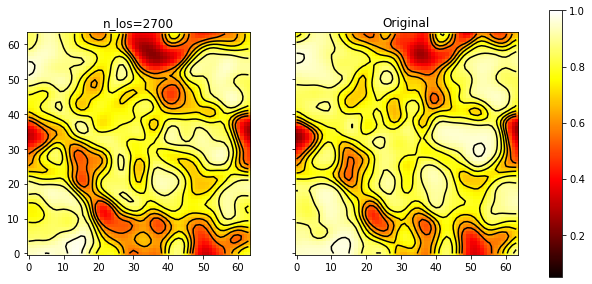

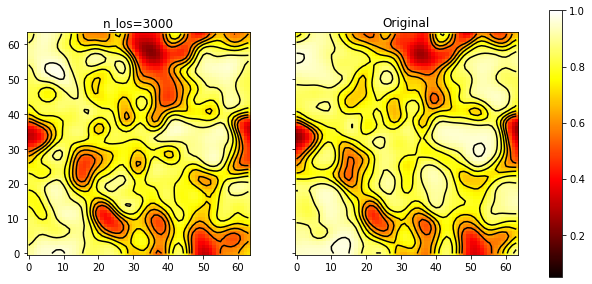

In [29]:
plot_list = {'vmin':0.05,'vmax':1,'cmap':"hot",'origin':'lower'}
con_list = {'levels':array([0.56, 0.64, 0.72, 0.8 , 0.88, 0.96]),'colors':'black'}
true_sm1 = ndimage.gaussian_filter(flux_true1,2)
for i,flux in enumerate(flux_recon2):
    for j in range(1):
        opt_sm1 =  ndimage.gaussian_filter(flux,2)
        fig, ax = plt.subplots(1, 2, sharey='row',figsize=(11,5))

        im1 = ax[0].imshow(opt_sm1[:,:,j],**plot_list)
        ax[0].contour(opt_sm1[:,:,j],**con_list)
        ax[0].set_title('n_los=%d'%n_los[i])


        im3 = ax[1].imshow(true_sm1[:,:,j],**plot_list)
        ax[1].contour(true_sm1[:,:,j],**con_list)
        ax[1].set_title('Original')
        colorbar(im3,ax=ax,shrink=0.98)
#         suptitle(i,x=0.45)
    

In [32]:
d_los = n/(array(n_los))**0.5
d_los

array([3.69504172, 2.61278906, 2.13333333, 1.84752086, 1.65247289,
       1.50849447, 1.3965945 , 1.30639453, 1.23168057, 1.16847479])